In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data importation

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the file with automatic separator detection
data = pd.read_csv('data.txt', delim_whitespace=True)

# Extract target (y) and predictors (X)
Y = data['y']
X = data.drop(columns=['y'])

C:\Users\polol\AppData\Local\Temp\ipykernel_25340\2406083602.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('data.txt', delim_whitespace=True)


### Definition of the RMSE function and calculation of the baseline RMSE value (RMSE for a constant prediction of y)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Reference value of RMSE: RMSE for a constant prediction
print("RMSE baseline = ",Y.std())

RMSE baseline =  8.53123766184774


### Classic Regression RMSE on raw data

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds
n_splits = 5

# Initialize k-fold cross-validation (ensures equal distribution of y values in folds)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# List to store RMSE for each fold
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training set
    model.fit(X_train, Y_train)
    
    # Predict on the testing set
    predictions = model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    rmse_scores.append(rmse)

# Calculate average RMSE across all folds
average_rmse = np.mean(rmse_scores)

# Print RMSE for each fold and the average RMSE
print(f"RMSE for each fold: {rmse_scores}")
print(f"Average RMSE across {n_splits} folds: {average_rmse}")


Target variable statistics and visualisation

Descriptive statistics of Y:
count    100.000000
mean       2.332830
std        8.531238
min      -15.415300
25%       -5.608600
50%        2.446850
75%        8.510100
max       19.948200
Name: y, dtype: float64

Missing values in Y:
0



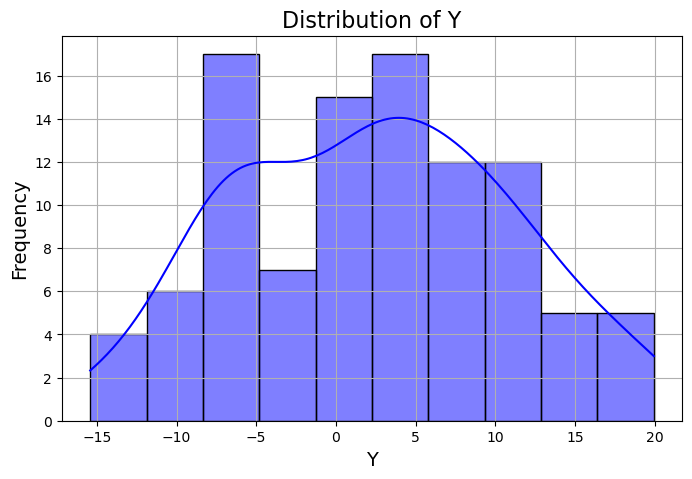

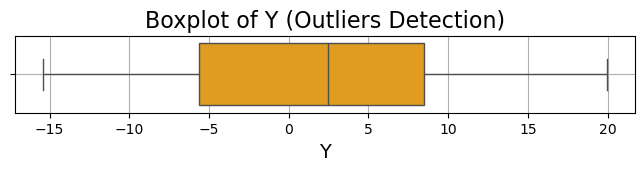

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of Y
print("Descriptive statistics of Y:")
print(Y.describe())
print()

# Check for missing values
print("Missing values in Y:")
print(Y.isnull().sum())
print()

# Plot the distribution of Y
plt.figure(figsize=(8, 5))
sns.histplot(Y, kde=True, bins=10, color='blue')
plt.title("Distribution of Y", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 1))
sns.boxplot(x=Y, color='orange')
plt.title("Boxplot of Y (Outliers Detection)", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# Interpretation:
# We can see that y doesn't have any outlier. Its distribution seems to be bigaussien with means of -5 and 3.
# Nothing special to notice about the targert variable.

Predictors statistics and visualisation

Target dimensions: (100,)
Predictors dimensions: (100, 200)
Missing values in X:
0

Essential statistics for each feature:
      count      mean       std     min       25%      50%       75%     max
X1    100.0 -0.035051  1.359068 -3.4291 -0.867575  0.15115  1.053475  2.3887
X2    100.0 -0.078354  0.984814 -2.2972 -0.774175  0.01460  0.539800  2.4131
X3    100.0  0.150572  1.069848 -2.8344 -0.510475  0.17915  0.806425  2.4918
X4    100.0 -0.015394  1.282862 -2.6529 -0.900700  0.04170  0.955075  3.0085
X5    100.0 -0.051926  0.936731 -2.5628 -0.619250 -0.10645  0.547525  2.5337
X6    100.0 -0.039884  0.821642 -2.0634 -0.530450 -0.08175  0.609425  1.9893
X7    100.0  0.059076  0.920917 -1.9322 -0.755475  0.06870  0.673400  2.3240
X8    100.0  0.114772  0.980563 -2.1004 -0.557450  0.13475  0.836800  2.6025
X9    100.0  0.190370  1.187863 -2.3275 -0.716625  0.14930  0.971675  2.8503
X10   100.0  0.190691  1.103915 -2.9258 -0.598525  0.04675  0.860350  2.9476
X11   100.0  0.022007  0.75750

C:\Users\polol\AppData\Local\Temp\ipykernel_25340\2034472412.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_X.index, y=outliers_X.values, palette="viridis")


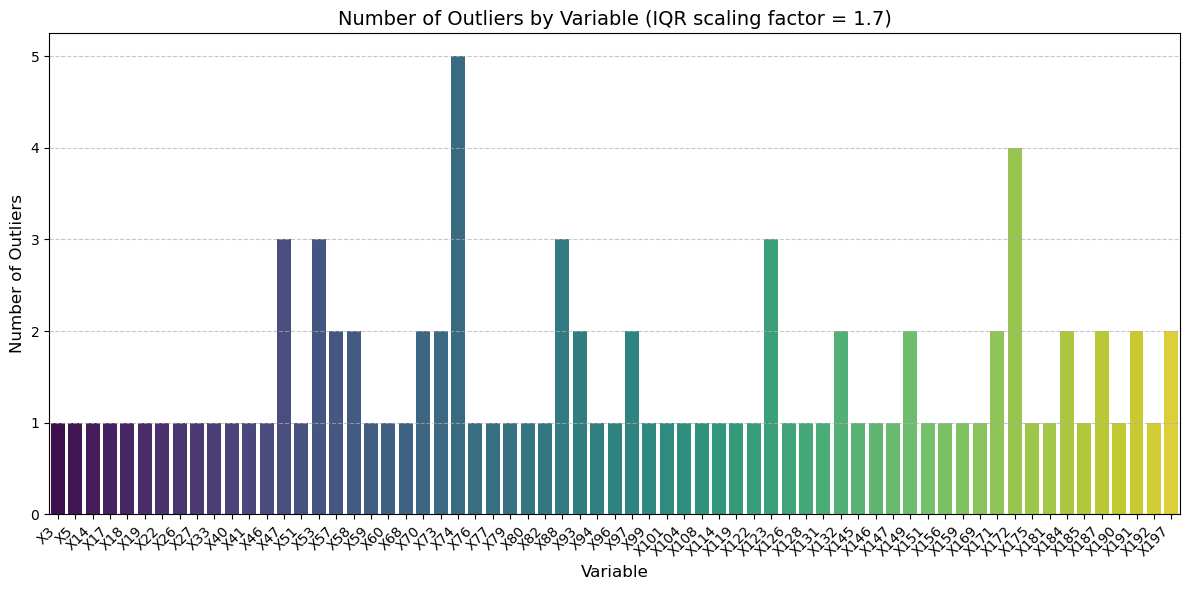

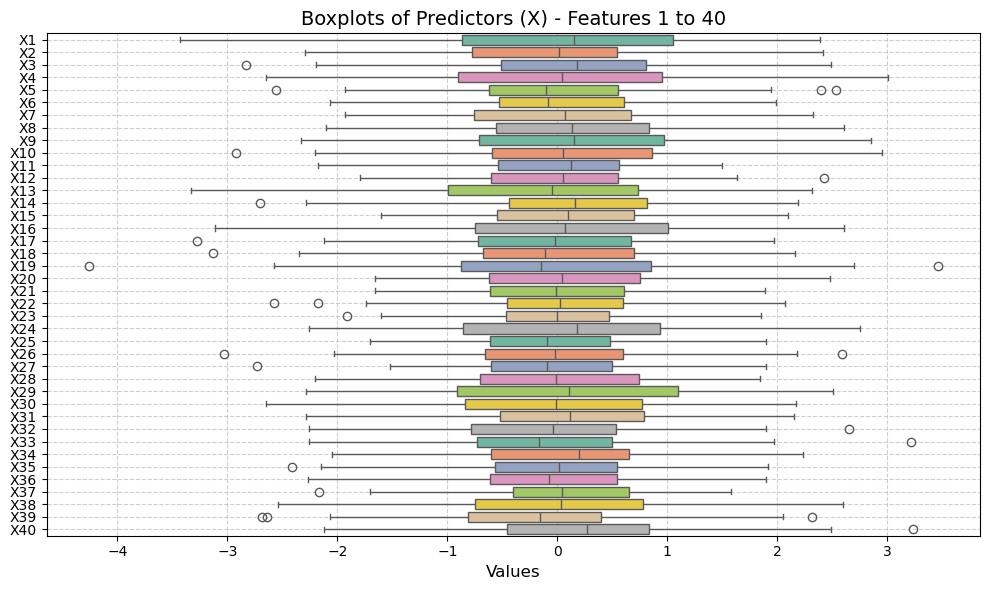

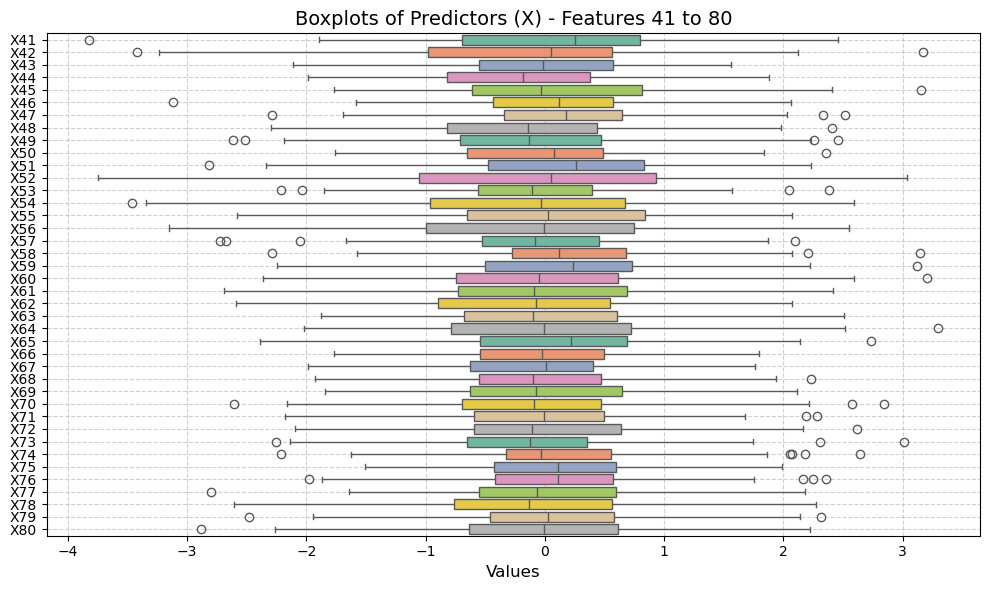

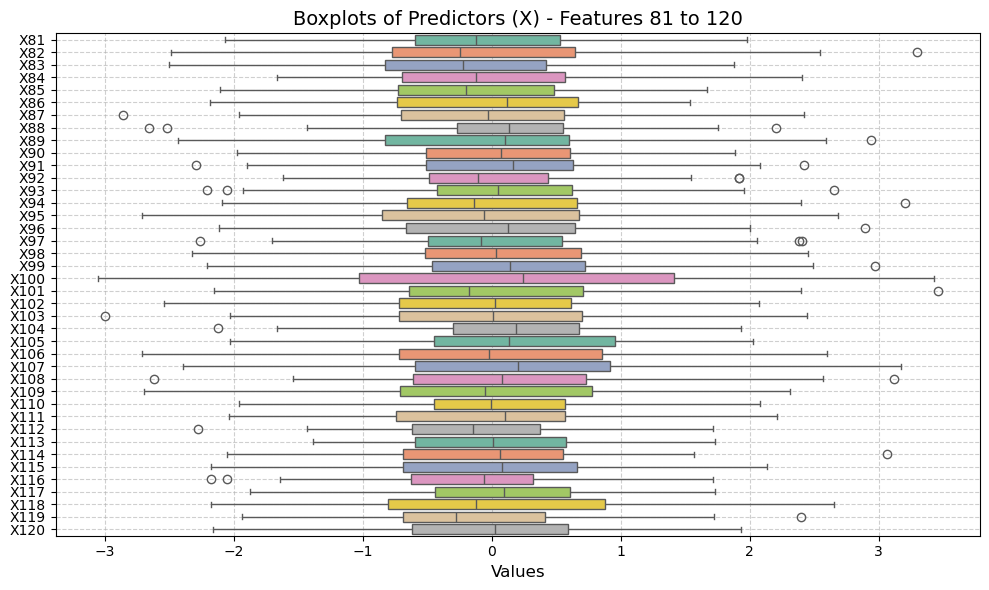

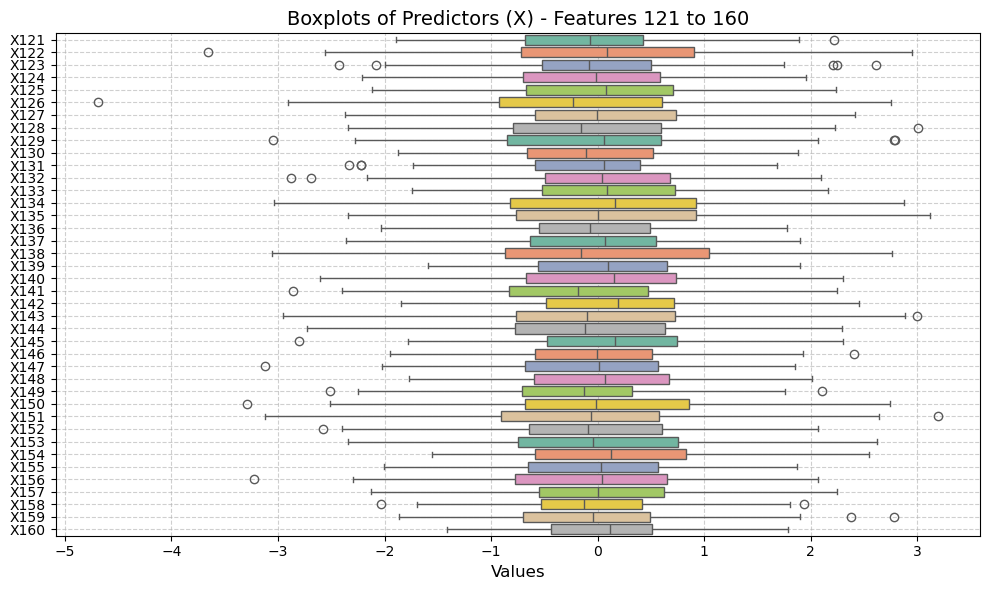

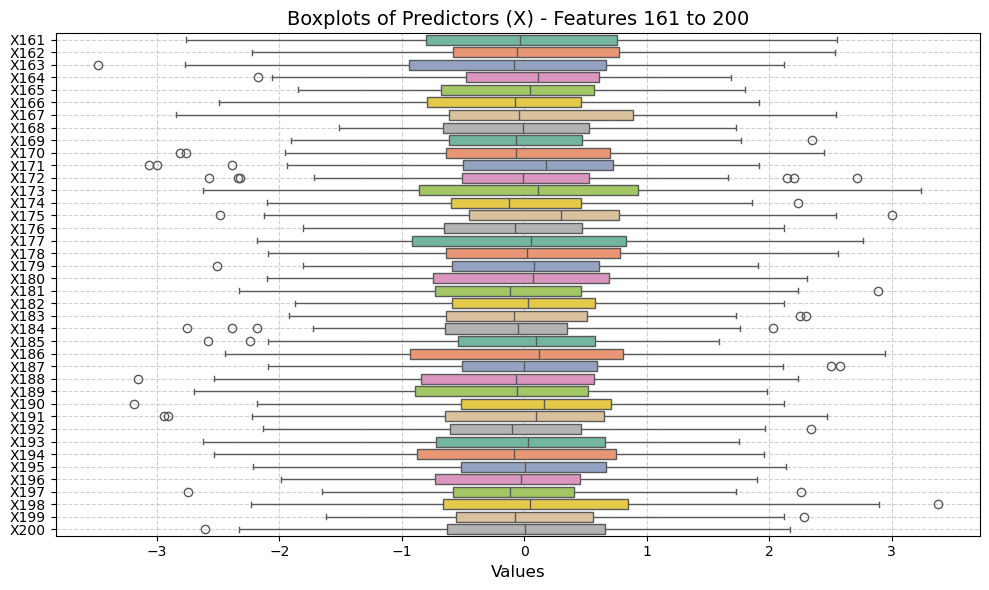

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Adjust pandas display settings to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Avoid line wrapping


### Display the basic information about the dataset to have a global vision of its content
print("Target dimensions:", Y.shape)
print("Predictors dimensions:", X.shape)


### Check for missing values
print("Missing values in X:")
print(X.isnull().sum().sum())
print()


### Display essential statistics
statistics = X.describe().T  # Transpose to display features as rows
print("Essential statistics for each feature:")
print(statistics, "\n")


### Outlier detection using the IQR method

# Detect outliers and count points with at least one outlier
def detect_outliers_summary(data, threshold=1.5):
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bounds, upper_bounds = Q1 - threshold * IQR, Q3 + threshold * IQR
    outlier_mask = (data < lower_bounds) | (data > upper_bounds)
    outliers_per_variable = outlier_mask.sum()
    points_with_outliers = outlier_mask.any(axis=1).sum()
    return outliers_per_variable[outliers_per_variable > 0], points_with_outliers

threshold = 1.7
outliers_X, total_points_with_outliers = detect_outliers_summary(X, threshold)
print(f"Total number of points with at least one outlier: {total_points_with_outliers}/{X.shape[0]}")

# Plot the number of outliers per variable
if not outliers_X.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=outliers_X.index, y=outliers_X.values, palette="viridis")
    plt.title(f"Number of Outliers by Variable (IQR scaling factor = {threshold})", fontsize=14)
    plt.xlabel("Variable", fontsize=12)
    plt.ylabel("Number of Outliers", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No outliers detected in any variable.")



### Plot features boxplots
# Group the predictors into smaller chunks for better visualization
chunk_size = 40  # Number of predictors per plot
n_chunks = int(np.ceil(X.shape[1] / chunk_size))  # Total number of chunks

for i in range(n_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, X.shape[1])
    
    # Subset of features for the current chunk
    subset = X.iloc[:, start:end]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=subset, orient='h', palette="Set2", showfliers=True)
    plt.title(f"Boxplots of Predictors (X) - Features {start + 1} to {end}", fontsize=14)
    plt.xlabel("Values", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Adjust the y-axis for better readability
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()




Interpretation of X boxplots and outlier statistics

We observe that there are many outliers in this dataset (More than half of the samples has a least one outlier among its coordinates). 
Given the small size of our dataset (only 100 samples), it may not be appropriate to remove them at this stage, as it could result in a significant loss of valuable data.


In [ ]:
### Plot each variable against the target variable (y)
# List of explanatory variables
features = X.columns

# Define the number of columns and rows for the subplots
n_features = len(X)
n_cols = 3  # Number of columns per figure
n_rows = int(np.ceil(len(features) / n_cols))

# Figure size (adjust as needed)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=X[feature], y=Y, alpha=0.5)
    plt.title(f'{feature} vs y')
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.grid(True)

plt.tight_layout()
plt.show()

We have twice as many features as samples, which could lead to significant challenges related to collinearity and overfitting. Reducing the dimensionality of the dataset is therefore essential. As a first step, we will analyze the correlations between the features and \(y\) to identify and remove obviously irrelevant features.

## Predictors correlation with target feature

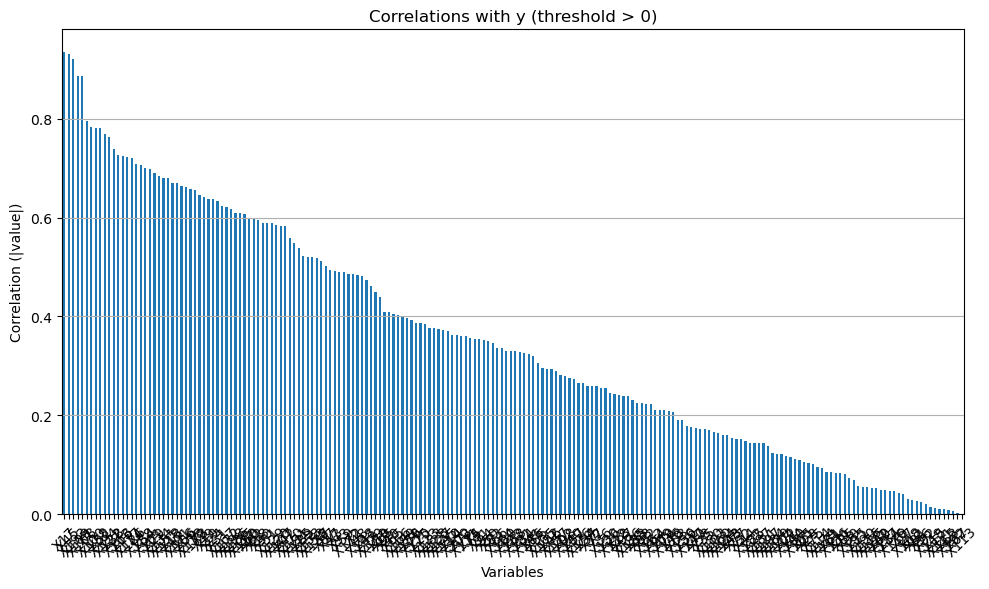

In [66]:
# Define a threshold for correlation to plot
corr_threshold = 0

correlations = X.corr()  # Exclude the correlation of y with itself

correlations = data.corr()['y'].drop('y').abs().sort_values(ascending=False)

# Filter correlations greater than corr_threshold
correlations = correlations[correlations > corr_threshold]

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', title=f"Correlations with y (threshold > {corr_threshold})")
plt.ylabel("Correlation (|value|)")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Interpretation

The variables exhibit a broad spectrum of correlation values with the target variable y, ranging from high (around 0.8) to low (approaching 0). However, the distribution of correlations appears relatively uniform across this range. This makes it difficult to identify a clear threshold or "breakpoint" to effectively reduce the dimensionality of the dataset.

We now perform a Partial Least Squares (PLS) regression to identify latent components 
that better capture the relationships between the predictors and the target variable y. 
This approach will help us isolate and eliminate less relevant features in a more systematic manner.

Normalization

In [ ]:
# Normalize the dataset
scaler = StandardScaler()
predictors_scaled_array = scaler.fit_transform(predictors)  # Returns a NumPy array

# Convert the NumPy array back to a DataFrame while preserving column names
predictors_scaled = pd.DataFrame(predictors_scaled_array, columns=predictors.columns)